Generate some data

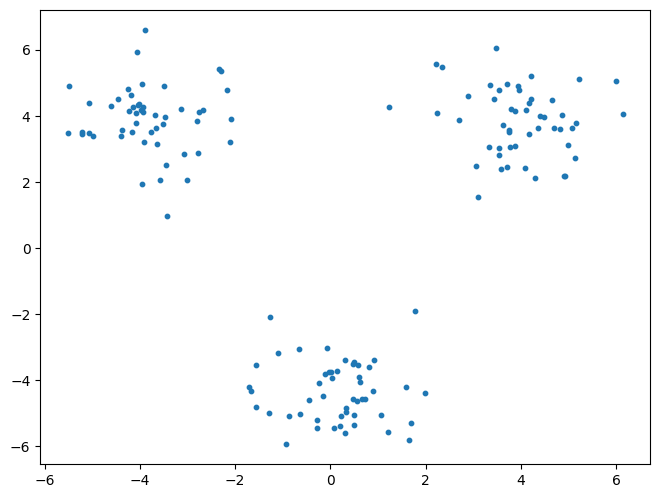

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# generate some random data
m = 50
X = np.vstack([np.random.randn(m, 2) + [4, 4],
               np.random.randn(m, 2) + [0, -4],
               np.random.randn(m, 2) + [-4, 4]])

# plot the data
plt.rcParams['figure.figsize'] = [20/2.54, 15/2.54]
plt.scatter(X[:, 0], X[:, 1], s=10);


Fit the k-means algorithm

In [2]:
from sklearn.cluster import KMeans

# fit the k-means algorithm
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X)

# get the labels and centers of the clusters
labels = kmeans.predict(X)
centers = kmeans.cluster_centers_

In [3]:
print(labels)
print(centers)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[[-3.80269621  3.88921484]
 [ 0.13787665 -4.34890155]
 [ 3.96905896  3.82145881]]


Visualize

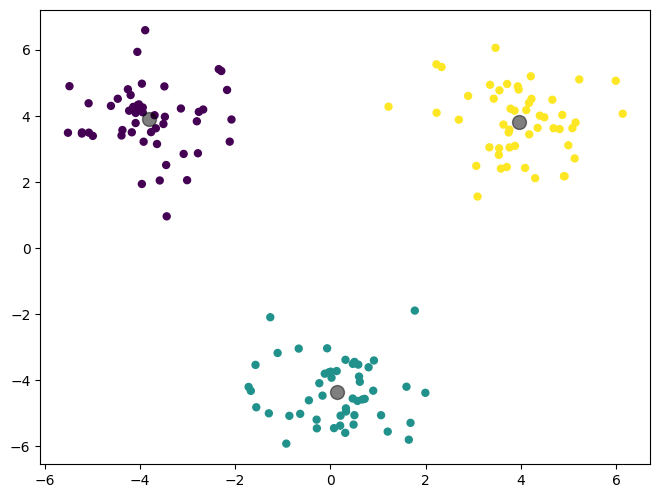

In [4]:
# plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=25, cmap='viridis')

# plot the centers of each cluster
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

Elbow method

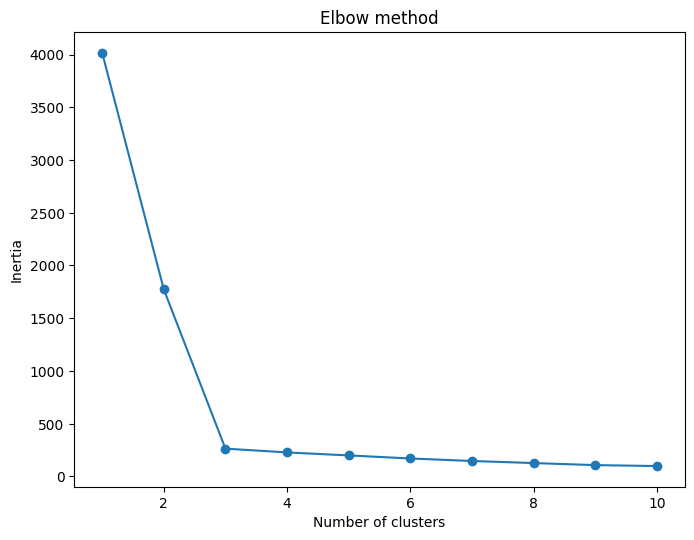

In [5]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [6]:
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image

def reduce_colors(image_path, k):
    # load the image and convert it to a numpy array
    image = Image.open(image_path)
    img_array = np.array(image)

    # flatten the array to be a list of pixels
    pixels = img_array.reshape(-1, img_array.shape[-1])

    # fit the k-means algorithm to the pixels
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pixels)

    # get the labels and centers of the clusters
    labels = kmeans.predict(pixels)
    centers = kmeans.cluster_centers_

    # replace each pixel with its nearest center
    new_pixels = centers[labels].reshape(img_array.shape)

    # convert the array back to an image and return it
    return Image.fromarray(np.uint8(new_pixels))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


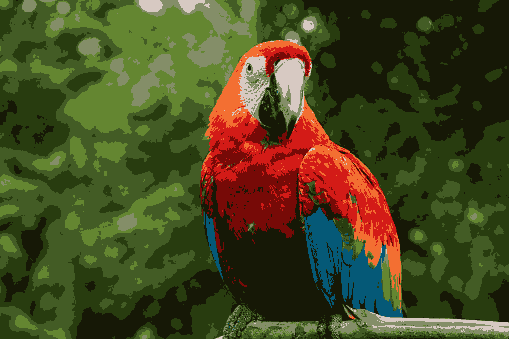

In [9]:
from IPython.display import display
image_path = "parrot.jpeg"
k = 10
new_image = reduce_colors("parrot.jpeg", k)
display(new_image)

As a homework implement k-means algorithm without using sklearn library